0.75


Text(0.5, 1.0, 'Аппроксимация функций. Интерполяционный многочлен в форме Лагранжа.')

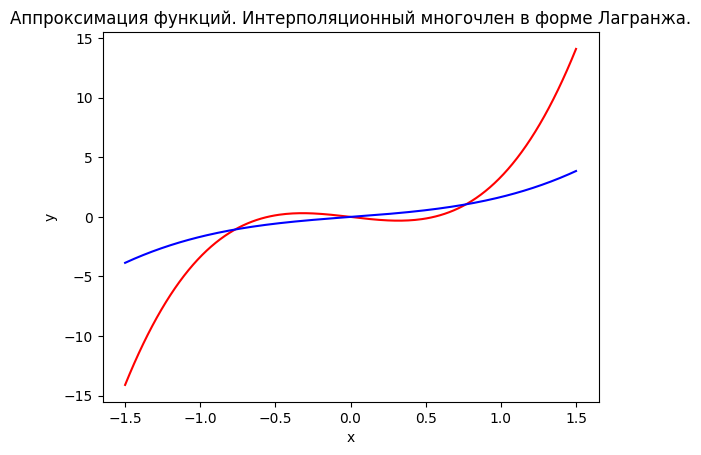

In [108]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

# Задаем граничные условия 
a = -1.5
b = 1.5
# Задаем количество точек по которым будет строиться многочлен
n = 4
# Высчитываем шаг (одинаковое расстояние между точками)
h = (b - a) / n
print(h)

# Задаем функцию, которую будем аппроксимировать, с помощью numpy
def f(t):
    return np.tan(t)

# Вычитываем изначальные (известные) точки x, y, по которым будем строить многочлен, иксы будут лежать на одинаковом друг от друга расстоянии h
x_values = [a + h * i for i in range(0, n + 1)]
y_values = [f(x_values[i]) for i in range(0, n + 1)]

# Высчитываем многочлен Лагранжа
def L(x):
    L = 0
    for i in range(0, n + 1):
        yi = y_values[i]

        # Базисные полиномы l[i]
        li = 1
        for j in range(0, n + 1):
            if (j != i):
                li *= (x - x_values[j]) / (x_values[i] - x_values[j])

        L += yi * li
    return L

# Точки x по которых мы будем искать L(x) и строить график, пусть это будут точки между известными (например точка между a=-1,5 и -1)
xi_values = []
# Значения изначальной функции (тангенс) в новых точках
start_func = []
# Значения многочлена Лагранжа в новых точках
Lagranzh = []

for i in range(1, n + 1):
    # Проходимся по каждой известной точке и прибавляем половину от шага h
    xi = a + h * (i - 1) + h / 2 
    xi_values.append(xi)
    start_func.append(f(xi))
    Lagranzh.append(L(xi))

# определяем x как 200 равноотстоящих значений между границами a b
xnew = np.linspace(a, b, 200 ) 

# определяем сплайн со степенью k=3 (k отвечает за плавность отрисовки) с помощью библиотеки scipy и используем полученный многочлен Лагранжа
spl = make_interp_spline(xi_values, Lagranzh, k=3)
# передаем "ось х", на которой будет строиться сплайн
y_smooth = spl(xnew)

spl_1 = make_interp_spline(xi_values, start_func, k=3 )
y_smooth_1 = spl_1(xnew)

# отрисовываем оба получившихся графика
plt.plot(xnew, y_smooth, color='red')
plt.plot(xnew, y_smooth_1, color='blue')

# определяем названия осей и название графика
plt.xlabel("x") 
plt.ylabel("y") 
plt.title("Аппроксимация функций. Интерполяционный многочлен в форме Лагранжа.") 

In [104]:
!pip install scipy


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


(-5.0, 5.0)

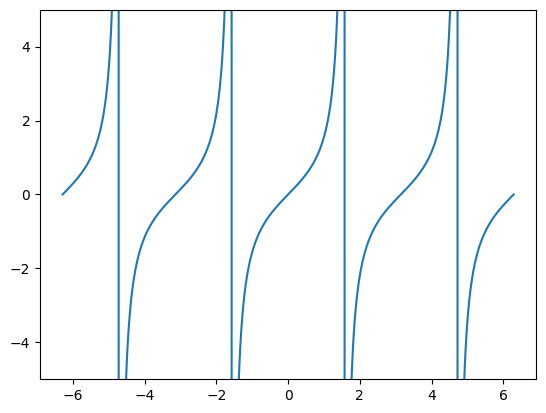

In [105]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
plt.plot(x, np.tan(x))
plt.ylim(-5, 5)